# Portfolio Optimisation

System which will create an optimal portfolio based on the stocks that we want. The necessary data will be retrieved from yahoo finance.


In [1]:
# Setup
from pandas_datareader import data as web
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
# Decide which stock we want to use
assets = ['MQG.AX', 'ANZ.AX', 'XRO.AX','Z1P.AX']

In [3]:
# Assigning portfolio weights to each stock (will change later)
weights = np.array([0.25,0.25,0.25,0.25])

In [4]:
# Starting date of stock data
stockStartDate = '2015-01-01'

In [5]:
# Todays date
today = datetime.today().strftime('%Y-%m-%d')
today

'2021-07-01'

In [6]:
# Adjusted close price of stock
df = pd.DataFrame()

for stock in assets:
    df[stock] = web.DataReader(stock, data_source = 'yahoo', start = stockStartDate, end = today)['Adj Close']
df.head()

,MQG.AX,ANZ.AX,XRO.AX,Z1P.AX
Date,,,,
2015-01-01,43.537643,22.635307,15.57,0.097846
2015-01-04,43.448391,22.593166,15.52,0.097846
2015-01-05,42.451809,22.319267,15.40,0.097846
2015-01-06,42.704678,22.277132,15.56,0.097846
2015-01-07,43.046783,22.410572,15.69,0.097846


### Visualisation

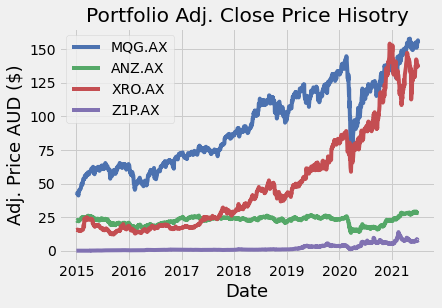

In [20]:
title = 'Portfolio Adj. Close Price Hisotry'

my_stocks = df

for c in my_stocks.columns.values:
    plt.plot(my_stocks[c],label=c)

plt.title(title)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Adj. Price AUD ($)', fontsize=18)
plt.legend(my_stocks.columns.values,loc = 'upper left')
plt.show()

Strong dip in share prices during initial COVID-19 outbreak. Macquarie Group and Xero share prices were hit the hardest among the 4. Strong reversal in prices as companies adapted and market confidence was restored.

In [8]:
# Daily return
returns = df.pct_change()
returns.head()

,MQG.AX,ANZ.AX,XRO.AX,Z1P.AX
Date,,,,
2015-01-01,NaN,NaN,NaN,NaN
2015-01-04,-0.002050,-0.001862,-0.003211,0.0
2015-01-05,-0.022937,-0.012123,-0.007732,0.0
2015-01-06,0.005957,-0.001888,0.010390,0.0
2015-01-07,0.008011,0.005990,0.008355,0.0


In [9]:
# Individual Stock Covariance
cov_matrix_annual = returns.cov()*252
cov_matrix_annual

,MQG.AX,ANZ.AX,XRO.AX,Z1P.AX
MQG.AX,0.071565,0.047328,0.034890,0.047975
ANZ.AX,0.047328,0.067689,0.025438,0.045664
XRO.AX,0.034890,0.025438,0.133467,0.049158
Z1P.AX,0.047975,0.045664,0.049158,0.934330


In [10]:
# Portfolio Variance
port_variance = np.dot(weights.T,np.dot(cov_matrix_annual,weights))
port_variance

0.10674738765807067

In [11]:
# portfolio volatitility
port_volatility = np.sqrt(port_variance)
port_volatility 

0.32672218727547514

In [12]:
# Annual Portfolio Return
portfolio_simple_annual_return = np.sum(returns.mean()*weights)*252
portfolio_simple_annual_return 

0.4356519563373268

In [13]:
# Summary
percent_var = str(round(port_variance,2)*100) + '%'
percent_vola = str(round(port_volatility,2)*100) + '%'
percent_ret = str(round(portfolio_simple_annual_return ,2)*100) + '%'

print('Expected annual return: '+percent_ret)
print('Annual Volatility: '+percent_vola)
print('Annual Variance: '+percent_var)

Expected annual return: 44.0%
Annual Volatility: 33.0%
Annual Variance: 11.0%


### Optimal Weightings for each Stock

In [14]:
pip install PyPortfolioOpt

Note: you may need to restart the kernel to use updated packages.


In [15]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt import plotting 

In [16]:
# Portfolio Optimisation  for Max Sharpe Ratio
mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

ef = EfficientFrontier(mu,S,weight_bounds=(None,None))
ef.add_constraint(lambda w: w[0]+w[1]+w[2]+w[3] == 1)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights() 

print(cleaned_weights)
ef.portfolio_performance(verbose=True)

OrderedDict([('MQG.AX', 1.0), ('ANZ.AX', -1.0), ('XRO.AX', 0.72783), ('Z1P.AX', 0.27217)])
Expected annual return: 72.8%
Annual volatility: 46.8%
Sharpe Ratio: 1.51


(0.7280806391081833, 0.46797794785833396, 1.5130641141290126)

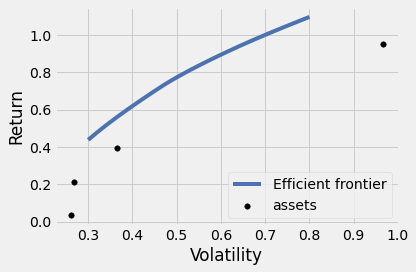

OrderedDict([('MQG.AX', 1.0), ('ANZ.AX', -1.0), ('XRO.AX', 0.72783), ('Z1P.AX', 0.27217)])
Expected annual return: 72.8%
Annual volatility: 46.8%
Sharpe Ratio: 1.51


(0.7280806391081833, 0.46797794785833396, 1.5130641141290126)

In [17]:
mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

ef = EfficientFrontier(mu,S,weight_bounds=(None,None))
ef.add_constraint(lambda w: w[0]+w[1]+w[2]+w[3] == 1)
risk_range = np.linspace(0.3,0.80,1000)
plotting.plot_efficient_frontier(ef, ef_param = 'risk', ef_param_range=risk_range, show_assets = True, showfig = True)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights() 

print(cleaned_weights)
ef.portfolio_performance(verbose=True)

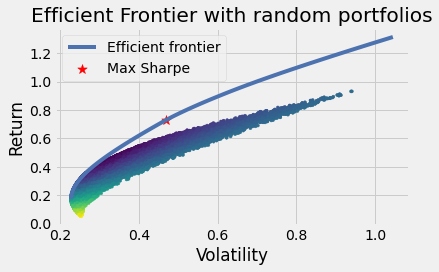

In [18]:
# Calculate the expected returns and the annualized sample covariance matrix of asset returns
mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

# Optimize for maximum sharpe ratio
ef = EfficientFrontier(mu,S,weight_bounds=(None,None))
ef.add_constraint(lambda w: w[0]+w[1]+w[2]+w[3] == 1)

fig, ax = plt.subplots()
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=False)

# Find the tangency portfolio
ef.max_sharpe()
ret_tangent, std_tangent, _ = ef.portfolio_performance()
ax.scatter(std_tangent, ret_tangent, marker="*", s=100, c="r", label="Max Sharpe")

# Generate random portfolios
n_samples = 20000
w = np.random.dirichlet(np.ones(len(mu)), n_samples)
rets = w.dot(mu)
stds = np.sqrt(np.diag(w @ S @ w.T))
sharpes = rets / stds
ax.scatter(stds, rets, marker=".", c=sharpes, cmap="viridis_r")

# Output
ax.set_title("Efficient Frontier with random portfolios")
ax.legend()
plt.tight_layout()
plt.savefig("ef_scatter.png", dpi=200)
plt.show()